In [32]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h1>Load data</h1>

In [33]:
file_name = "iris.data.csv"

In [34]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1>Data preprocessing</h1>

In [35]:
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:

In [252]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
print(np.shape(x_1))
#print(y_1)
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)

xTest = np.array(x_test_1)
yTest = np.array(y_test_1)
x = np.array(x_1)
y = np.array(y_1)

Index(['petal_length', 'petal_width'], dtype='object')
species
(150, 2)


<h2>Define hyper-parameters</h2>

In [253]:
#define number of training iterations
NUM_ITER = 100
#define learning rate
lr = 0.01

<h2>Define Placeholder and Variables</h2>

In [254]:
tf.reset_default_graph()
#define the placeholder to feed the training data later
X = tf.placeholder(tf.float32,shape=[None,2],name='X')
Y = tf.placeholder(tf.float32,shape=[None,1],name='Y')

#define the weights and initialized with random normal distribution
W = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W')
#define the bias with zero initialization
b = tf.Variable(tf.zeros([1,1]),tf.float32,name='b')


<h2>Define update rule and accuracy</h2>

In [255]:


#define the predicted output label, Tensorflow doesn't have step function, we use tf.round to do that
Y_hat = tf.round(tf.sigmoid(tf.add(tf.matmul(X,W),b)))
#the error between target and logit
error = Y-Y_hat

#weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
dW = tf.matmul(tf.transpose(X),error)
db = tf.reduce_sum(error,0)
W_ = W + lr*dW
b_ = b + lr*db

#group two operations together
step = tf.group(W.assign(W_), b.assign(b_))

#compare the predicted labels with true labels
correct_pred = tf.equal(Y_hat,Y)

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

<h2>Execute training</h2>

step 0, Accuracy= 0.962
step 1, Accuracy= 0.962
step 2, Accuracy= 0.981
step 3, Accuracy= 0.981
step 4, Accuracy= 0.981
step 5, Accuracy= 0.990
step 6, Accuracy= 0.990
step 7, Accuracy= 0.990
step 8, Accuracy= 0.990
step 9, Accuracy= 0.990
step 10, Accuracy= 0.990
step 11, Accuracy= 1.000
step 12, Accuracy= 1.000
step 13, Accuracy= 1.000
step 14, Accuracy= 1.000
step 15, Accuracy= 1.000
step 16, Accuracy= 1.000
step 17, Accuracy= 1.000
step 18, Accuracy= 1.000
step 19, Accuracy= 1.000
step 20, Accuracy= 1.000
step 21, Accuracy= 1.000
step 22, Accuracy= 1.000
step 23, Accuracy= 1.000
step 24, Accuracy= 1.000
step 25, Accuracy= 1.000
step 26, Accuracy= 1.000
step 27, Accuracy= 1.000
step 28, Accuracy= 1.000
step 29, Accuracy= 1.000
step 30, Accuracy= 1.000
step 31, Accuracy= 1.000
step 32, Accuracy= 1.000
step 33, Accuracy= 1.000
step 34, Accuracy= 1.000
step 35, Accuracy= 1.000
step 36, Accuracy= 1.000
step 37, Accuracy= 1.000
step 38, Accuracy= 1.000
step 39, Accuracy= 1.000
step 40, A

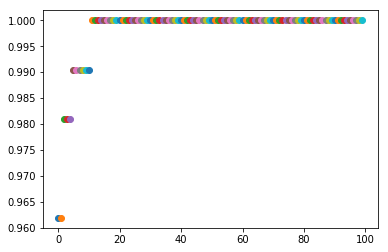

In [256]:

import matplotlib.pyplot as plt
#initialize tensorflow variables
init = tf.global_variables_initializer()

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(NUM_ITER):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step,feed_dict = {X:x_train_1,Y:y_train_1})
        
        acc = sess.run(accuracy,feed_dict= {X:x_train_1,Y:y_train_1})
        print("step "+str(i)+", Accuracy= {:.3f}".format(acc))
        #plt.scatter(i,acc)
        plt.plot(i,acc,marker = 'o')
        #print(sess.run(Y_hat,feed_dict={X:x_1, Y:y_1}))
    print("Training finished!")
    
    print("Testing ACcuracy:", sess.run(accuracy, feed_dict={X:x_test_1, Y:y_test_1}))
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    W = np.squeeze(sess.run(W))
    b = np.squeeze(sess.run(b))
    plt.show()   
    

<h2>Plot</h2>

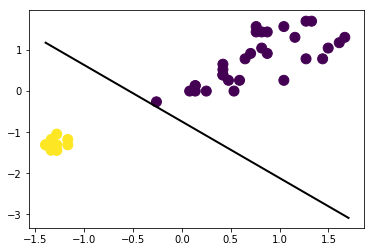

In [258]:
#plot out the decision line determined by learned weight and bias
import matplotlib.pyplot as plt


plot_x = np.array([np.min(xTest[:, 0]), np.max(xTest[:, 1])])
plot_y = 1 / W[1] * (-W[0] * plot_x - b)


#print(plot_x)
#print(plot_y[1,0])

plt.scatter(xTest[:, 0], xTest[:, 1], c=np.squeeze(yTest), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
#plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

The Testing accuracy is 100% as well as the training accuracy. The above training is based on the petal width and length of Setosa, so it shows that the Setosa has a unique petal shape from the other two types. This can also be found by the clear boundry line in the above picture as well as the large distance between the Setosa set and Non-Setosa set. 

<h1>Part b:</h1>

In [260]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)
x2 = np.array(x_2)
y2 = np.array(y_2)
xTest2 = np.array(x_test_2)
yTest2 = np.array(y_test_2)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameter</h2>

In [261]:
#define number of training iterations
NUM_ITER2 = 100
#define learning rate
lr2 = 0.01

<h2>Define Placeholder and Variables</h2>

In [262]:
tf.reset_default_graph()
tf.reset_default_graph()
#define the placeholder to feed the training data later
X2 = tf.placeholder(tf.float32,shape=[None,2],name='X2')
Y2 = tf.placeholder(tf.float32,shape=[None,1],name='Y2')

#define the weights and initialized with random normal distribution
W2 = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W2')
#define the bias with zero initialization
b2 = tf.Variable(tf.zeros([1,1]),tf.float32,name='b2')


<h2>Define update rule and accuracy</h2>

In [263]:
#define the predicted output label, Tensorflow doesn't have step function, we use tf.round to do that
Y_hat2 = tf.round(tf.sigmoid(tf.add(tf.matmul(X2,W2),b2)))
#the error between target and logit
error2 = Y2-Y_hat2

#weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
dW2 = tf.matmul(tf.transpose(X2),error2)
db2 = tf.reduce_sum(error2,0)
W_2 = W2 + lr2*dW2
b_2 = b2 + lr2*db2

#group two operations together
step2 = tf.group(W2.assign(W_2), b2.assign(b_2))

#compare the predicted labels with true labels
correct_pred2 = tf.equal(Y_hat2,Y2)

#compute the accuracy by taking average
accuracy2 = tf.reduce_mean(tf.cast(correct_pred2,tf.float32),name='accuracy2')

<h2>Execute training</h2>

step 0, Accuracy= 0.743
step 1, Accuracy= 0.771
step 2, Accuracy= 0.829
step 3, Accuracy= 0.810
step 4, Accuracy= 0.886
step 5, Accuracy= 0.905
step 6, Accuracy= 0.895
step 7, Accuracy= 0.914
step 8, Accuracy= 0.924
step 9, Accuracy= 0.943
step 10, Accuracy= 0.933
step 11, Accuracy= 0.943
step 12, Accuracy= 0.952
step 13, Accuracy= 0.952
step 14, Accuracy= 0.981
step 15, Accuracy= 0.981
step 16, Accuracy= 0.981
step 17, Accuracy= 0.981
step 18, Accuracy= 0.981
step 19, Accuracy= 0.981
step 20, Accuracy= 0.981
step 21, Accuracy= 0.981
step 22, Accuracy= 0.981
step 23, Accuracy= 0.981
step 24, Accuracy= 0.981
step 25, Accuracy= 0.981
step 26, Accuracy= 0.981
step 27, Accuracy= 0.981
step 28, Accuracy= 0.981
step 29, Accuracy= 0.981
step 30, Accuracy= 0.981
step 31, Accuracy= 0.981
step 32, Accuracy= 0.981
step 33, Accuracy= 0.981
step 34, Accuracy= 0.981
step 35, Accuracy= 0.981
step 36, Accuracy= 0.981
step 37, Accuracy= 0.981
step 38, Accuracy= 0.981
step 39, Accuracy= 0.981
step 40, A

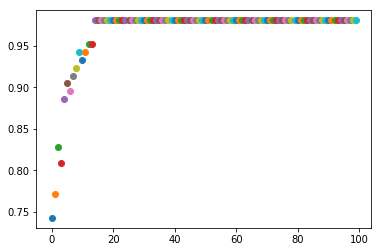

In [266]:
import matplotlib.pyplot as plt
#initialize tensorflow variables
init = tf.global_variables_initializer()

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(NUM_ITER2):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step2,feed_dict = {X2:x_train_2,Y2:y_train_2})
        
        acc = sess.run(accuracy2,feed_dict= {X2:x_train_2,Y2:y_train_2})
        print("step "+str(i)+", Accuracy= {:.3f}".format(acc))
        #print(sess.run(Y_hat,feed_dict={X:x_1, Y:y_1}))
        plt.plot(i,acc,marker = 'o')
    print("Training finished!")
    
    print("Testing ACcuracy:", sess.run(accuracy2, feed_dict={X2:x_test_2, Y2:y_test_2}))
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    W2 = np.squeeze(sess.run(W2))
    b2 = np.squeeze(sess.run(b2))
    plt.show()

<h2>Plot</h2>

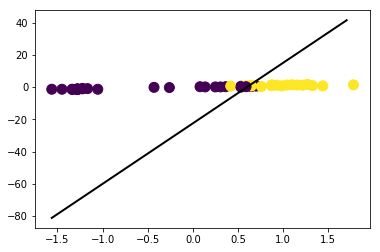

In [267]:
#plot out the decision line determined by learned weight and bias
import matplotlib.pyplot as plt
plot_x2 = np.array([np.min(xTest2[:, 0]), np.max(xTest2[:, 1])])
plot_y2 = 1 / W2[1] * (-W2[0] * plot_x2 - b2)

plt.scatter(xTest2[:, 0], xTest2[:, 1], c=np.squeeze(yTest2), s=100, cmap='viridis')
plt.plot(plot_x2, plot_y2, color='k', linewidth=2)
#plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

The testing accuracy is below 90%, even though the training accuracy is around 98%. Combined with teh plot shown above, we can state that verginica does not have a unique petal length and width compared with other flowers.  

<h1>Part c:</h1>

In [159]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [173]:
#learning rate
#lr = 0.005
lr = 0.005
#number of traning steps
#num_steps =1750
#number of batch_size
#batch_size = 32
NUM_ITER = 1000

#network parameters
n_hidden_1 = 256
n_hidden_2 = 128
#n_hidden_3 = 1200
num_input = 4
num_classes = 3

<h2>Define placehoder and variables</h2>

In [174]:
tf.reset_default_graph()
tf.reset_default_graph()

#tf graph input
X = tf.placeholder(tf.float32,[None,num_input],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

#Layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([num_input, n_hidden_1]),name='W1'),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]),name='W2'),
    #'W3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]),name='W3'),
    'Wout': tf.Variable(tf.random_normal([n_hidden_2, num_classes]),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'b2': tf.Variable(tf.zeros(shape=[n_hidden_2]),name='b2'),
    #'b3': tf.Variable(tf.zeros(shape=[n_hidden_3]),name='b3'),
    'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
}

<h2>Define the neural network</h2>

In [175]:
#define a neural net model
def neural_net(x):
    
    layer_1_out = tf.add(tf.matmul(x,weights['W1']),biases['b1'])
    #drop_out_temp = tf.nn.dropout(layer_1_out)
    layer_1_out = tf.nn.relu(layer_1_out)
    
    #layer_1_out = tf.nn.sigmoid(layer_1_out)
    layer_2_out = tf.add(tf.matmul(layer_1_out, weights['W2']),biases['b2'])
    layer_2_out = tf.nn.relu(layer_2_out)
    
    out = tf.add(tf.matmul(layer_2_out, weights['Wout']),biases['bout'])
    return out

<h2>Define cost function and accuracy</h2>

In [176]:

#predicted labels
logits = neural_net(X)

#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits, 1),tf.argmax(Y, 1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#Initialize the variables
init = tf.global_variables_initializer()

<h2>Execute training</h2>

In [177]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(NUM_ITER):
        #fetch batch
        sess.run(train_op, feed_dict={X:x_train_3, Y:y_train_3})
        acc = sess.run(accuracy,feed_dict={X:x_train_3, Y:y_train_3})
        print("step "+str(i)+", Accuracy= {:.3f}".format(acc))
        #print(mnist.train.shape())
    
    print("Training finished!")
    
    print("Testing ACcuracy:", sess.run(accuracy, feed_dict={X:x_test_3, Y:y_test_3}))

step 0, Accuracy= 0.781
step 1, Accuracy= 0.800
step 2, Accuracy= 0.743
step 3, Accuracy= 0.810
step 4, Accuracy= 0.762
step 5, Accuracy= 0.848
step 6, Accuracy= 0.829
step 7, Accuracy= 0.857
step 8, Accuracy= 0.895
step 9, Accuracy= 0.876
step 10, Accuracy= 0.867
step 11, Accuracy= 0.876
step 12, Accuracy= 0.914
step 13, Accuracy= 0.905
step 14, Accuracy= 0.914
step 15, Accuracy= 0.914
step 16, Accuracy= 0.914
step 17, Accuracy= 0.905
step 18, Accuracy= 0.933
step 19, Accuracy= 0.943
step 20, Accuracy= 0.943
step 21, Accuracy= 0.943
step 22, Accuracy= 0.943
step 23, Accuracy= 0.943
step 24, Accuracy= 0.952
step 25, Accuracy= 0.962
step 26, Accuracy= 0.962
step 27, Accuracy= 0.952
step 28, Accuracy= 0.943
step 29, Accuracy= 0.914
step 30, Accuracy= 0.952
step 31, Accuracy= 0.962
step 32, Accuracy= 0.962
step 33, Accuracy= 0.962
step 34, Accuracy= 0.962
step 35, Accuracy= 0.962
step 36, Accuracy= 0.971
step 37, Accuracy= 0.962
step 38, Accuracy= 0.971
step 39, Accuracy= 0.962
step 40, A

step 354, Accuracy= 1.000
step 355, Accuracy= 1.000
step 356, Accuracy= 1.000
step 357, Accuracy= 1.000
step 358, Accuracy= 1.000
step 359, Accuracy= 1.000
step 360, Accuracy= 1.000
step 361, Accuracy= 1.000
step 362, Accuracy= 1.000
step 363, Accuracy= 1.000
step 364, Accuracy= 1.000
step 365, Accuracy= 1.000
step 366, Accuracy= 1.000
step 367, Accuracy= 1.000
step 368, Accuracy= 1.000
step 369, Accuracy= 1.000
step 370, Accuracy= 1.000
step 371, Accuracy= 1.000
step 372, Accuracy= 1.000
step 373, Accuracy= 1.000
step 374, Accuracy= 1.000
step 375, Accuracy= 1.000
step 376, Accuracy= 1.000
step 377, Accuracy= 1.000
step 378, Accuracy= 1.000
step 379, Accuracy= 1.000
step 380, Accuracy= 1.000
step 381, Accuracy= 1.000
step 382, Accuracy= 1.000
step 383, Accuracy= 1.000
step 384, Accuracy= 1.000
step 385, Accuracy= 1.000
step 386, Accuracy= 1.000
step 387, Accuracy= 1.000
step 388, Accuracy= 1.000
step 389, Accuracy= 1.000
step 390, Accuracy= 1.000
step 391, Accuracy= 1.000
step 392, Ac

step 707, Accuracy= 1.000
step 708, Accuracy= 1.000
step 709, Accuracy= 1.000
step 710, Accuracy= 1.000
step 711, Accuracy= 1.000
step 712, Accuracy= 1.000
step 713, Accuracy= 1.000
step 714, Accuracy= 1.000
step 715, Accuracy= 1.000
step 716, Accuracy= 1.000
step 717, Accuracy= 1.000
step 718, Accuracy= 1.000
step 719, Accuracy= 1.000
step 720, Accuracy= 1.000
step 721, Accuracy= 1.000
step 722, Accuracy= 1.000
step 723, Accuracy= 1.000
step 724, Accuracy= 1.000
step 725, Accuracy= 1.000
step 726, Accuracy= 1.000
step 727, Accuracy= 1.000
step 728, Accuracy= 1.000
step 729, Accuracy= 1.000
step 730, Accuracy= 1.000
step 731, Accuracy= 1.000
step 732, Accuracy= 1.000
step 733, Accuracy= 1.000
step 734, Accuracy= 1.000
step 735, Accuracy= 1.000
step 736, Accuracy= 1.000
step 737, Accuracy= 1.000
step 738, Accuracy= 1.000
step 739, Accuracy= 1.000
step 740, Accuracy= 1.000
step 741, Accuracy= 1.000
step 742, Accuracy= 1.000
step 743, Accuracy= 1.000
step 744, Accuracy= 1.000
step 745, Ac

<h2>Plot</h2>